# Diffusion Equation with 0 Flux Boundary Condition and Implicit Method

The equation which we are trying to solve is is again 

>  $\frac{\partial c}{\partial t} = D \frac {\partial^2c}{\partial t^2}$

Upon discretization by Implicit Method we get the following equation :

>  $ c _{i}^{t + \Delta t}( 1 + 2\alpha) - \alpha(c_{i-1}^{t+\Delta t} + c_{i+1}^{t+\Delta t}) = c^{t}_{i}$

where $ \alpha = D \frac{\Delta t}{\Delta x^2} $

For practial purposes implementing this equation in loops is computationally expensive. That's why we use vectorization to solve this equation represented as 

>  $ c^{t + \Delta t} = A^{-1} c^{t} $

this is what we actually need to implement in our code. 

In [ ]:
# ------ importing libraries ------ #

import numpy as np
from matplotlib import pyplot as plt

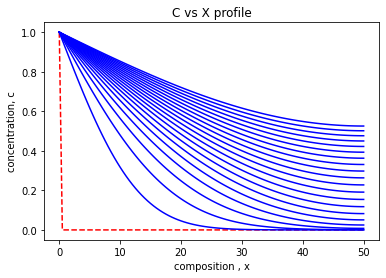

In [ ]:
# ------ defining parameters ------ #

dt = 0.1 
dx = 0.5 
D = 1.0
N = 101
alpha = D * dt / dx ** 2

# ------ defining composition array ------ #

x = np.zeros((N,1))
for i in range (0,N-1):
    x[i+1][0] = x[i][0] + dx

# ------ defining concentration arrays ------ #

c = np.zeros((N,1)) # this will denote the future time scheme concentration t + delt
c[0][0] = 1.0 # implementation of initial condition

cold = np.zeros((N,1)) # this will denote the current time scheme t
cold = c

plt.plot (x,c, color = "red", linestyle = "--") # plotting intital condition

# ------ defining the matrix A from the equation ------ #
A = np.zeros((N,N)) 
A[0,0] = 1.0

for j in range(1,N): # populating the diagonal elements
    A[j,j] = 1 + 2 * alpha

for j in range(1,N-1): # populating the lower diagonal elements
    A[j,j-1] = - alpha

A[N-1,N-2] = -2 * alpha 

for j in range(2,N): # populating the upper diagonal elements
    A[j-1,j] = - alpha

Ainverse = np.linalg.inv(A) # calculating the inverse 

for k in range (0,20): # the number of figures to be printed
    
    for j in range (0, 500): # the number of timesteps
        
        c = np.dot(Ainverse,cold) 
        
        for i in range (0, N):
            cold[i][0] = c[i][0] # updation
        
    
    plt.plot(x,c, color = "blue")
    plt.xlabel ("composition , x")
    plt.ylabel ("concentration, c")
    plt.title ("C vs X profile")

The explicit method is computationally very simple and implicit method is quite costly. 


The red dashed curve shows the initial profile however we get the same solution profile. 

